# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 2. Методы нахождения оценок. Бутстреп. Байесовская статистика
### Мягкий дедлайн --- 27 октября 23:59
### Жёсткий дедлайн --- 2 ноября 16:59

Выполняйте задания прямо в ноутбуке. Пожалуйста, не стирайте условия задач.

- Информация о выполнении и курсе в целом есть в чате https://t.me/+IHdLycZDD5g5MDQy.
- По вопросам об условиях задач, требованиям можно писать в чат или https://t.me/vitalii_kondratiuk .
- По организационным вопросам https://t.me/d_pavlov_p

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* собственно кодом,
* Перед ячейками с кодом в случае необходимости пишите, что Вы вычисляете, что ожидаете увидеть и как будете анализировать результат
* После каждого числа или графика пишите анализ: каков результат? Оправдал ли он ожидания? Какие особености Вы увидели? Откуда они взялись?
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Для красоты графиков можно (и приветствуется) вместо гистограммы использовать ядерную оценку плотности (kernel density estimator): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Загрузим необходимый для задачи 2 датасет. Если что-то пошло не так, то просто скачайте файл по ссылке вручную.

In [1]:
import statsmodels.api as sm
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /home/ntheme/Data1/Workfiles/Programming/Projects/MIPT/MathStats/Weibull.csv
100%|██████████████████████████████████████| 17.9k/17.9k [00:00<00:00, 71.5MB/s]


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps
import scipy.integrate as integrate

from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})
matplotlib.rcParams['figure.figsize'] = (16, 9)

**Условие задания**: Великая Ордалия уже почти готова к путешествию, однако враги империи проникли в замок и уничтожили все формулы с оценками из Домашнего задания 1. Можно попытаться восстановить их по памяти, но не лучше ли взамен старых оценок изобрести новые? Помимо этого за две тысячи лет (прошедших с момента первой ордалии до наших дней) точечные оценки значительно устарели и уже не способны отражать реальную суть вещей, поэтому Вам будет предложено попробовать на практике два других подхода: интервальные оценки и байесовские оценки.

В этой практике Вам предложено реализовать несколько подходов к построению оценок и понять, когда какой подход применять.

**Дисклеймер**:
В задачах будет разбиение на пункты, но оцениваться задача будет **целиком**. Можете считать, что выполнение всех пунктов вместе с отсутствием замечаний по полноте анализа/эффективности кода/информативности графиков/т.д. приносит полный балл.

### Задача 1

Прочитайте ещё раз задачу 1 домашки 1. Вы сравнивали оценки исходя из визуальных свойств их графиков. Пришло время начать сравнивать оценки строго!

Напомним, что в задаче речь шла про оценки параметра $\theta$ распределения $U[0, \theta]$: $2\overline{X}$, $\frac{n+1}{n} X_{(n)}$, $(n+1)X_{(1)}$, $\overline{X} + X_{(n)}/ 2$ и $X_{(1)}+X_{(n)}$. Как и ранее, зафиксируем какое-то конкретное значение параметра, скажем, $\theta = 1$.

Постройте плотности для первых трёх оценок. Настойчиво просим предоставлять решение в виде теха, но если у вас лапки, то можете прикрепить фото с хорошо разборчивым почерком.

__Решение и ответ:__

#### 1) $2 \overline{X}$

Сначала докажу для $\theta = 1$
$$S_n = \sum\limits_{i=1}^{n} X_i$$

По условию мы зафиксировали $\theta = 1$. Докажу, что плотность $S_n$ равна $$p(n, x) = \frac{1}{(n-1)!} \sum\limits_{k=0}^{n} (-1)^k \binom{n}{k} (x-k)^{n-1} I_{[0, x]}(k)$$

1) $x < 0$

    $I_{[0, x]}(k) = I_{\emptyset}(k) \equiv 0 \rightarrow p(n, x)|_{x < 0} \equiv 0$

2) $n \leq x$

    $I_{[0, x]}(k) = I_{[0, n]}(k) = 1 \rightarrow p(n, x)|_{x > n} = \frac{1}{(n-1)!} \sum\limits_{k=0}^{n} (-1)^k \binom{n}{k} (x-k)^{n-1} = 
    \frac{1}{(n-1)!} \sum\limits_{k=0}^{n} \left( (-1)^k \binom{n}{k} \sum\limits_{l=0}^{n-1} (-1)^{n-l-1} \binom{n-1}{l}x^l k^{n-l-1} \right) = 
    \frac{1}{(n-1)!} \sum\limits_{k=0}^{n} \sum\limits_{l=0}^{n-1} (-1)^k \binom{n}{k} (-1)^{n-l-1} \binom{n-1}{l}x^l k^{n-l-1} = $

    $= \frac{1}{(n-1)!} \sum\limits_{l=0}^{n-1} (-1)^{n-l-1} \binom{n-1}{l}x^l \sum\limits_{k=0}^{n} (-1)^k \binom{n}{k} k^{n-l-1} = 
    \{\text{Так как } 0 \leq n - l-1 < n \text{, то данное тождество следует из алгема (ортогональность последней стоки обратной матрицы, составленной по катетам треугольника паскаля)}\} =
    \frac{1}{(n-1)!} \sum\limits_{l=0}^{n-1} (-1)^{n-l-1} \binom{n-1}{l}x^l \cdot 0 \equiv 0$

3) $0 \leq x \leq n$

    **База:** $n = 1$
   
    $p(1, x) = \frac{1}{0!} (-1)^0 \binom{1}{0} (x-0)^{1-1} = 1$ - верно (просто плотность равномерного распределения)
   
    **Шаг:** доказать, что $(p(n, \cdot) * p(1, \cdot))(x) = p(n + 1, x)$
    
    $(p(n, \cdot) * p(1, \cdot))(x) = \int_\mathbb{R} p(n, t) p(1, x - t)dt = \int\limits_{x-1}^{x} p(n, t)dt$
   
    Пусть $a <= x < a + 1$. Тогда 
    $(p(n, \cdot) * p(1, \cdot))(x) = \int\limits_{x-1}^{a} p(n, t)dt + \int\limits_{a}^{x} p(n, t)dt = 
    \frac{1}{n!} \sum\limits_{k = 0}^{a - 1} (-1)^k \binom{n}{k} (a - k)^n - \frac{1}{n!} \sum\limits_{k = 0}^{a - 1} (-1)^k \binom{n}{k} (x - 1 - k)^n + 
    \frac{1}{n!} \sum\limits_{k = 0}^{a} (-1)^k \binom{n}{k} (x - k)^n - \frac{1}{n!} \sum\limits_{k = 0}^{a} (-1)^k \binom{n}{k} (a - k)^n = $
   
    $= -\frac{1}{n!} \sum\limits_{k = 0}^{a - 1} (-1)^k \binom{n}{k} (x - 1 - k)^n + \frac{1}{n!} \sum\limits_{k = 0}^{a} (-1)^k \binom{n}{k} (x - k)^n= 
    \frac{1}{n!} \sum\limits_{k = 1}^{a} (-1)^k \binom{n}{k - 1} (x - k)^n + \frac{1}{n!} \sum\limits_{k = 0}^{a} (-1)^k \binom{n}{k} (x - k)^n= 
    \frac{1}{n!} \sum\limits_{k = 0}^{a} (-1)^k \binom{n + 1}{k} (x - k)^n= $
   
    $$= \frac{1}{n!} \sum\limits_{k = 0}^{n + 1} (-1)^k \binom{n + 1}{k} (x - k)^n I_{[0, x]}(k)$$

Тогда $$p_{2\overline{X}} = \frac{1}{(n-1)!} \sum\limits_{k=0}^{n} (-1)^k \binom{n}{k} \left(\frac{nx}{2}-k\right)^{n-1} I_{[0, \frac{nx}{2}]}(k) \cdot \frac{n}{2}$$

Для произвольного $\theta$: по сути мы умножаем случайные величины из $\mathcal{U}(0, 1)$ на $\theta$. 
Тогда $$p_{2\overline{X}} = \frac{1}{(n-1)!} \sum\limits_{k=0}^{n} (-1)^k \binom{n}{k} \left(\frac{nx}{2\theta}-k\right)^{n-1} I_{[0, \frac{nx}{2\theta}]}(k) \cdot \frac{n}{2\theta}$$
   

#### 2) $\frac{n+1}{n}X_{(n)}$

$F_{\frac{n+1}{n}X_{(n)}}(x) = P(\frac{n+1}{n}X_{(n)} < x) = \prod\limits_{k=1}^{n}P(\frac{n+1}{n}X_k <x) = P(\frac{n+1}{n}X_1<x)^n = (\frac{n}{n + 1}\frac{x}{\theta})^nI_{[0, \theta]}(\frac{n}{n + 1}x)$

$$p_{\frac{n+1}{n}X_{(n)}}(x) = \frac{n^{n+1} x^{n-1}}{\theta^n(n+1)^{n}} I_{[0, \theta]}\left(\frac{n}{n+1}x\right)$$

Для $\theta = 1$:
$$p_{\frac{n+1}{n}X_{(n)}}(x) = \frac{n^{n+1} x^{n-1}}{(n+1)^{n}} I_{[0, 1]}\left(\frac{n}{n+1}x\right)$$

#### 3) $(n+1)X_{(1)}$

$F_{(n+1)X_{(1)}}(x) = P((n+1)X_{(1)} < x) = 1 - P((n+1)X_{(1)} > x) = 1 - \prod\limits_{k=1}^{n} P((n+1)X_{k} > x) = 1 - (1 - P((n+1)X_{k} < x))^n = (1 - (1 - \frac{x}{\theta(n + 1)})^n)I_{[0, \theta]}(\frac{x}{n + 1})$

$$p_{(n+1)X_{(1)}}(x) = \frac{n}{\theta(n+1)} \left(1-\frac{x}{\theta(n+1)}\right)^{n-1}I_{[0, \theta]}\left(\frac{x}{n + 1}\right)$$

Для $\theta = 1$:
$$p_{(n+1)X_{(1)}}(x) = \frac{n}{n+1} \left(1-\frac{x}{n+1}\right)^{n-1}I_{[0, 1]}\left(\frac{x}{n + 1}\right)$$

Для квадратичной функции потерь посчитайте аналитически (для первых трёх оценок) и численно (для каждой оценки) риск для выборки из $N$ элементов. Начните с $N=1000$ и уменьшите его, если вычисления будут неподъемными. Для численного вычисления интеграла можно использовать scipy.integrate.quad или метод Монте-Карло.

1) $2\overline{X}$

    $\mathbb{E}_{\theta} \left( \theta^* - \theta \right)^2 = \mathbb{E}_{\theta} \left( 2{\overline{X}} - \theta \right)^2 = 
    \frac{4}{n^2} \mathbb{E}_{\theta} \left( \sum\limits_{i=1}^{n}X_i \right)^2 - 4 \theta \mathbb{E}_{\theta} {\overline{X}} + \theta^2 = 
    \frac{4}{n^2} \sum\limits_{i=1}^{n}\mathbb{E}_{\theta}X_i ^2 + \frac{4}{n^2} \sum\limits_{i,j=1, i \neq j}^{n}\mathbb{E}_{\theta}(X_i X_j) - 4 \theta \mathbb{E}_{\theta} {X_1} + \theta^2 = 
    \frac{4}{n^2} n(\mathbb{D}_{\theta}X_1 + \mathbb{E}_{\theta}X_1 ^2) + \frac{4}{n^2} n(n-1)\mathbb{E}_{\theta}^2 X_1 - 4 \theta \mathbb{E}_{\theta} {X_1} + \theta^2 = 
    \frac{4}{n^2} n(\frac{1}{12} + \frac{1}{4}) + \frac{4}{n^2} n(n-1)\frac{\theta}{4} - 4 \theta \frac{\theta}{2} + \theta^2 = \frac{\theta}{3n}$

2) $\frac{n+1}{n}X_{(n)}$

    $\mathbb{E}_{\theta} \frac{n+1}{n}X_{(n)} = \int\limits_{-\infty}^{\infty} x \frac{n^{n+1} x^{n-1}}{\theta^n(n+1)^{n}} I_{[0, \theta]}\left(\frac{n}{n+1}x\right) dx = 
    \int\limits_{0}^{\frac{(n+1)\theta}{n}} \frac{n^{n+1} x^{n}}{\theta^n(n+1)^{n}} dx = 
    \frac{(n+1)^{n+1}\theta^{n+1}}{(n+1) n^{n+1}} \frac{n^{n+1}}{\theta^n(n+1)^{n}} = \theta$
   
    $\mathbb{E}_{\theta} \left(\frac{n+1}{n}X_{(n)} \right)^2 = \int\limits_{-\infty}^{\infty} x^2 \frac{n^{n+1} x^{n-1}}{\theta^n(n+1)^{n}} I_{[0, \theta]}\left(\frac{n}{n+1}x\right) dx = 
    \int\limits_{0}^{\frac{(n+1)\theta}{n}} \frac{n^{n+1} x^{n + 1}}{\theta^n(n+1)^{n}} dx = 
    \frac{(n+1)^{n+2}\theta^{n+2}}{(n+2) n^{n+2}} \frac{n^{n+1}}{\theta^n(n+1)^{n}} = \frac{(n+1)\theta^2}{n(n+2)}$
    
    $\mathbb{E}_{\theta} \left( \theta^* - \theta \right)^2 = \mathbb{E}_{\theta} \left( \frac{n+1}{n}X_{(n)} - \theta \right)^2 = \mathbb{E}_{\theta} \left(\frac{n+1}{n}X_{(n)} \right)^2 - 2 \theta \mathbb{E}_{\theta} \frac{n+1}{n}X_{(n)} + \theta^2 = \frac{\theta^2}{n(n+2)}$

3) $(n+1)X_{(1)}$

    $\mathbb{E}_{\theta} (n+1)X_{(1)} = \int\limits_{-\infty}^{\infty} x \frac{n}{\theta(n+1)} \left(1-\frac{x}{\theta(n+1)}\right)^{n-1}I_{[0, \theta]}\left(\frac{x}{n + 1}\right) dx = 
    \int\limits_{0}^{\theta (n+1)} n \left(1-\frac{x}{\theta(n+1)}\right)^{n-1} dx - \int\limits_{0}^{\theta (n+1)} n \left(1-\frac{x}{\theta(n+1)}\right)^{n} dx  = \frac{n \theta (n+1)}{n} - \frac{n\theta (n+1)}{n+1} = \theta$
   
    $\mathbb{E}_{\theta} \left( (n+1)X_{(1)} \right)^2 = \int\limits_{-\infty}^{\infty} x^2 \frac{n}{\theta(n+1)} \left(1-\frac{x}{\theta(n+1)}\right)^{n-1}I_{[0, \theta]}\left(\frac{x}{n + 1}\right) dx = 
    n(n+1)\theta \int\limits_{0}^{\theta (n+1)} \left( \frac{x}{\theta(n+1)} \right)^2 \left(1-\frac{x}{\theta(n+1)}\right)^{n-1} dx = n (n+1)^2 \theta^2 \mathcal{B}(n, 3) = \frac{2(n+1)\theta^2 }{n+2}$
   
   $\mathbb{E}_{\theta} \left( \theta^* - \theta \right)^2 = \mathbb{E}_{\theta} \left( (n+1)X_{(1)} - \theta \right)^2 = \mathbb{E}_{\theta} \left((n+1)X_{(1)} \right)^2 - 2 \theta \mathbb{E}_{\theta} (n+1)X_{(1)} + \theta^2 = \frac{\theta^2 n}{n+2}$


Сгенерирую выборку

In [3]:
THETA = 1
N = 1000

unf = sps.uniform.rvs(loc=0, scale=THETA, size=(N, N))

unf_avg = np.cumsum(unf, axis=-1) / np.arange(1, N + 1)
unf_max = np.maximum.accumulate(unf, axis=-1)
unf_min = np.minimum.accumulate(unf, axis=-1)

unf_key = {"avg2": r'$2 \overline{X}$',
           "avgm": r'$\overline{X} + \frac{X_{(n)}}{2}$',
           "minn": r'$(n + 1) X_{(1)}$',
           "mimx": r'$X_{(1)} + X_{(n)}$',
           "maxn": r'$\frac{n+1}{n} X_{(n)}$'}

unf_apx = {"avg2": 2 * unf_avg,
           "avgm": unf_avg + unf_max / 2,
           "minn": np.arange(2, N + 2) * unf_min,
           "mimx": unf_min + unf_max,
           "maxn": np.arange(2, N + 2) * unf_max / np.arange(1, N + 1)}

nor_grd = {"avg2": np.linspace(-7, 7, num=2500),
           "avgm": np.linspace(-5, 5, num=2500),
           "minn": np.linspace(-50, 50, num=2500),
           "mimx": np.linspace(-0.1, 0.1, num=2500),
           "maxn": np.linspace(-0.1, 0.1, num=2500)}

unf_grd = np.linspace(0.95, 1.05, num=2500)

Определю функции подсчета подынтегральной функции риска и вывода его численного значения 

In [4]:
def risk_quad(x, apx, par, pdf):
    """
    Квадратичный риск
    :param x: точка, в которой считаем значение подынтегральной функции риска
    :param apx: оценка параметра
    :param par: значение параметра
    :param pdf: плотность распределения
    :return: значение подынтегральной функции в точке х
    """
    return (apx - par) ** 2 * pdf(x)


def risk_modl(x, apx, par, pdf):
    """
    L1 риск
    :param x: точка, в которой считаем значение подынтегральной функции риска
    :param apx: оценка параметра
    :param par: значение параметра
    :param pdf: плотность распределения
    :return: значение подынтегральной функции в точке х
    """
    return np.abs(apx - par) * pdf(x)


def risk_hubr(x, apx, par, pdf, delta=0.5):
    """
    Риск с использованием функции потерь Хубера
    :param x: точка, в которой считаем значение подынтегральной функции риска
    :param apx: оценка параметра
    :param par: значение параметра
    :param pdf: плотность распределения
    :param delta: параметр функции потерь
    :return: значение подынтегральной функции в точке х
    """
    if np.abs(apx - par) < delta:
        return (apx - par) ** 2 / 2 * pdf(x)
    else:
        return delta * (np.abs(apx - par) - delta / 2) * pdf(x)


def unf_risk_show(func, pdf=sps.uniform(loc=0, scale=THETA).pdf, low=0, high=1) -> None:
    """
    Отображение значений риска оценок
    :param func: функция риска
    :param pdf: распределение
    :param low: нижняя граница интегрирования
    :param high: верхняя граница интегрирования
    :return: None
    """
    plt.figure(figsize=(6, 1))
    plt.axis('off')
    for idx, (key_, val_) in enumerate(unf_key.items()):
        plt.text(0, 0.5 * idx,
                 rf"Риск для {val_} = {integrate.quad(func=func, a=low, b=high, args=(unf_apx[key_][0, -1], THETA, pdf))[0]}")
    plt.show()

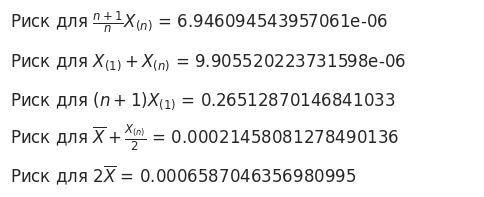

In [5]:
unf_risk_show(risk_quad)

Постройте распределения оценок для одного $\theta$ на одном графике

In [6]:
def make_plot(xlabex: str, ylabel: str, title: str = "Plot", xlim: list = None, ylim: list = None, **kwargs) -> (
        plt.figure, plt.axis):
    """
    Creates a plot with the following parameters
    
    :param xlabex: x-axis label
    :param ylabel: y-axis label
    :param title: plot title
    :param xlim: x-limits
    :param ylim: y-limits
    """
    fig_, axs_ = plt.subplots(**kwargs)

    axs_.set_xlabel(xlabex)
    axs_.set_ylabel(ylabel)
    axs_.set_title(title)

    if xlim is not None:
        axs_.set_xlim(xlim)
    if ylim is not None:
        axs_.set_ylim(ylim)

    return fig_, axs_

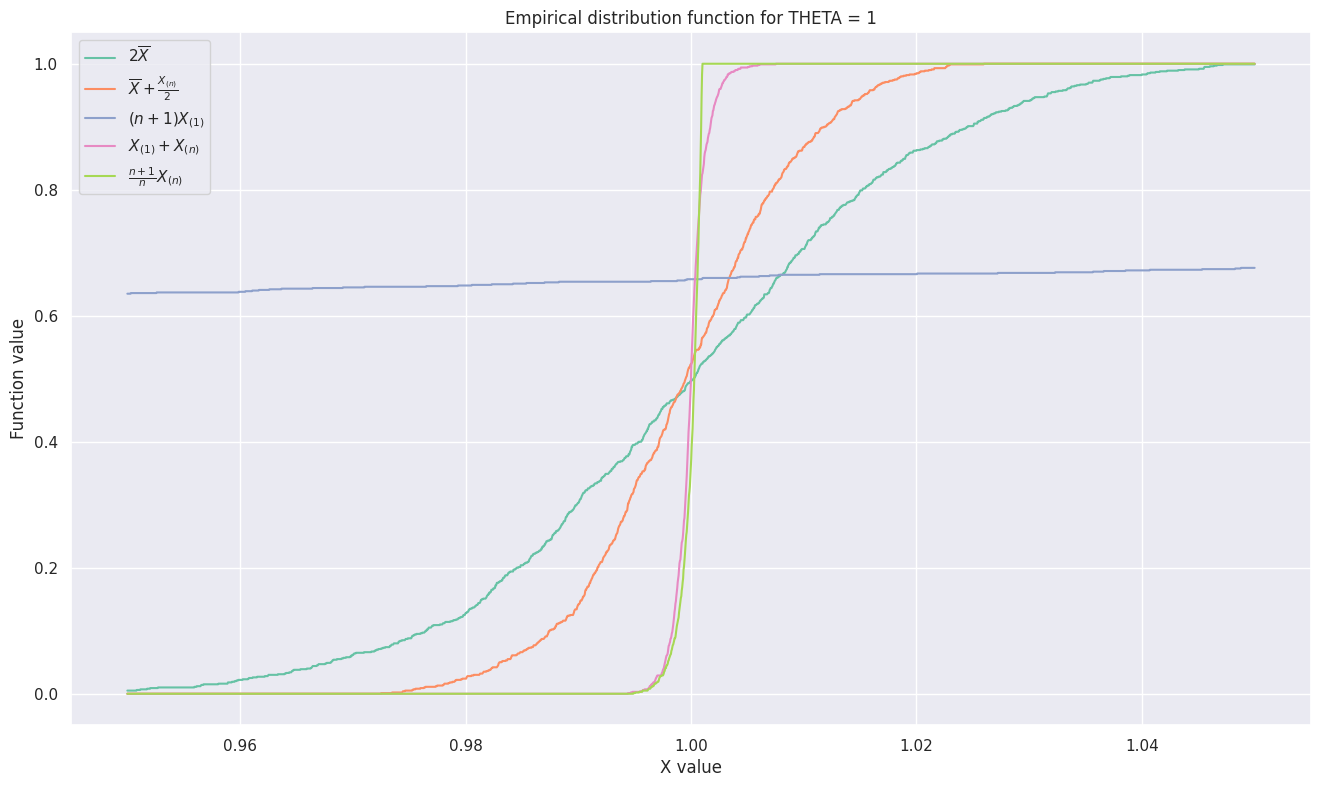

In [7]:
_, axs = make_plot(xlabex=r'X value', ylabel=r'Function value',
                   title=f"Empirical distribution function for THETA = {THETA}")
for key, val in unf_apx.items():
    sns.lineplot(x=unf_grd, y=sps.ecdf(val[:, -1]).cdf.evaluate(unf_grd), ax=axs,
                 label=unf_key[key])
plt.show()

Вспомните свой вывод из задачи 1. Согласуется ли выбор "лучшей" оценки с понятием квадратичного риска? Почему?

Ответ:
Согласуется. В задаче 1 мы получили, что оценки $X_{(1)} + X_{(n)}$ и $\frac{n+1}{n} X_{(n)}$ в данном критерии являются наилучшими (графики практически совпадают), а $(n + 1) X_{(1)}$ - наихудшей. Исходя из значений функции риска мы видим, что у  $X_{(1)} + X_{(n)}$ и $\frac{n+1}{n} X_{(n)}$ он на несколько порядков меньше, чем у $2 \overline{X}$ и $\overline{X} + \frac{X_{(n)}}{2}$, а у них в свою очередь риск на несколько порядков меньше, чем у $(n + 1) X_{(1)}$. Так как мы выбираем оценку по принципу минимизации риска, то выбор в текущей задаче согласно понятию квадратичного риска согласуется с выбором из задачи 1

Вспомните и напишите формулировку теоремы Рао-Крамера. Посчитайте, какую нижнюю оценку риска предлагает эта теорема. Сравните её численное значение с посчитанным Вами риском. Сделайте выводы.

__Ответ:__
Для любой несмещённой оценки $\theta^*$ для $\tau(\theta)$ c $\mathbb{E}_{\theta} \theta^{*2} < \infty$ и для любого $\theta \in \Theta$ справедливо неравенство:
$$\mathbb{D}_{\theta} \theta^*(X) \geq \frac{\tau'^2(\theta)}{I_X(\theta)}$$

Найдем информацию Фишера:

$$I_X(\theta) = \mathbb{E}_{\theta} \left(\frac{\partial}{\partial \theta} \ln \rho_{\theta}(X) \right)^2 = \mathbb{E}_{\theta} \left(\frac{\partial}{\partial \theta} \ln \left( \frac{1}{\theta^n} \cdot I_{[0, \theta]}(X) \right) \right)^2 = \mathbb{E}_{\theta} \left( -\frac{n}{\theta} \right)^2 = \frac{n^2}{\theta^2}$$

Минимальное значение риска: 

$$\frac{\tau'^2(\theta)}{I_X(\theta)} = \frac{\theta^2}{n^2}$$

# WTF

Численно посчитайте риск для функции потерь $l(x, y) = |x - y|$ и для какой-то другой осмысленной предложенной Вами функцией потерь. Будет ли порядок качества на оценках таким же, как и для квадратичного подхода?

Рассмотрим $L_1$ норму

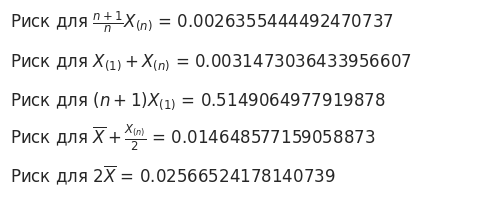

In [8]:
unf_risk_show(risk_modl)

И функцию потерь Хубера с параметром $\delta = 0.5$

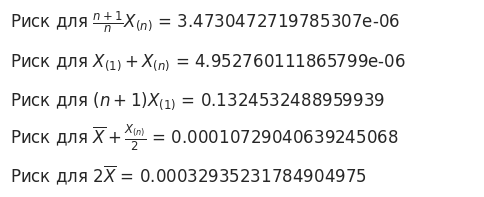

In [9]:
unf_risk_show(risk_hubr)

Функция Хубера даёт наименьшее среднее значение риска среди всех трёх подходов, так как она объединяет преимущества квадратичного и линейного подходов, эффективно снижая влияние выбросов. Квадратичный подход (L2-норма) имеет наибольшее значение риска, так как он чувствителен к большим ошибкам (выбросам). Абсолютная ошибка (L1-норма) также менее чувствительна к выбросам, чем квадратичная ошибка, но менее эффективна, чем функция Хубера. Для $L_1$ нормы значения функции риска получились больше для значений меньше 0 и меньше для остальных чем квадратичной, что довольно логично, так как по сути мы извлекли корень при той же самой константной плотности равномерного распределения.

Вернёмся к вадратичной функции потерь. Пусть теперь сам параметр $\theta$ приходит из распределения $\mathsf Q$ с плотностью $q(x) = xI[0, 1]$. Посчитайте численно байесовский риск каждой оценки. Сравните оценки в байесовском подходе. Остался ли порядок прежним?

$p_{x}(X) = \frac{1}{x^n} \cdot I_{[0, x]}(X)$

$q(x) = x I_{[0, 1]}(x)$

$p_{\theta | X}(x | X) \sim x^{n-1} I_{[0, x]}(X) I_{[0, 1]}(x) \sim t^{n-1} I_{[X_{(n)}, 1]}(x)$

$1 = \int\limits_{-\infty}^{\infty} p_{\theta | X}(x | X) = k \cdot \int\limits_{-\infty}^{\infty} x^{n-1} I_{[X_{(n)}, 1]}(x) = k \cdot \frac{1 - X_{(n)}^n}{n} \Leftrightarrow k = \frac{n}{1 - X_{(n)}^n} \rightarrow p_{\theta | X}(x | X) =  \frac{n x^{n-1}}{1 - X_{(n)}^n} I_{[X_{(n)}, 1]}(x)$

$\mathbb{E}((\theta^* - \theta)^2 | X) = \int\limits_{-\infty}^{\infty} x \frac{n x^{n-1}}{1 - X_{(n)}^n} I_{[X_{(n)}, 1]}(x) = \frac{1 - X_{(n)}^{n+1}}{1 - X_{(n)}^n} \cdot \frac{n}{n+1}$   

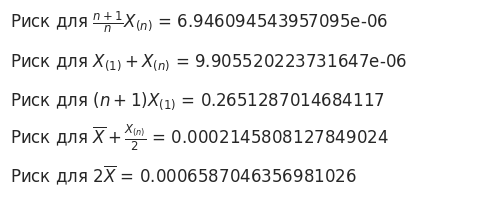

In [10]:
def unf_pdf_apr(x):
    if unf[0].max() <= x <= 1:
        return N * x ** (N - 1) / (1 - unf[0].max() ** N)
    else:
        return 0


unf_risk_show(risk_quad, unf_pdf_apr, low=unf[0].max())

 Порядок оценок, как и их "хорошесть" относительно друг друга остались прежними, что означает хорошее приближение байесовской оценкой параметра и ее согласованность с оценкой фиксированного значения параметра

Подберите такую плотность на $\theta$, при котором порядок сравнения может измениться или объясните, почему это невозможно. Если Вы подобрали плотности, приведите пример постановки задачи, при которой Ваша плотность имеет практический смысл.

*Указание:* не пытайтесь обогнать оценку-максимум по качеству, но может другие две оценки можно заставить сравниваться по-разному для разных плотностей.

Сделайте вывод о сравнении оценок и теореме Рао-Крамера

## Задача 2

Имперские банки каждую ночь подсчитывают баланс ресурсов Ордалии по сравнению с вчерашней ночью. За день приходят как новые ресурсы, так и потребляются уже имеющиеся. Как и у любого другого банка, если обозначить $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь, то $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В файле Weibull.csv находятся соответствующие измерения.

Наша задача состоит в том, чтобы оценить параметр формы.

Формальное условие: для распределения Вейбулла, функция распределения которого предложена выше, предлагается найти оценку параметра $\gamma$.

In [11]:
wbl_sample = np.loadtxt("Weibull.csv")

1. Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна.

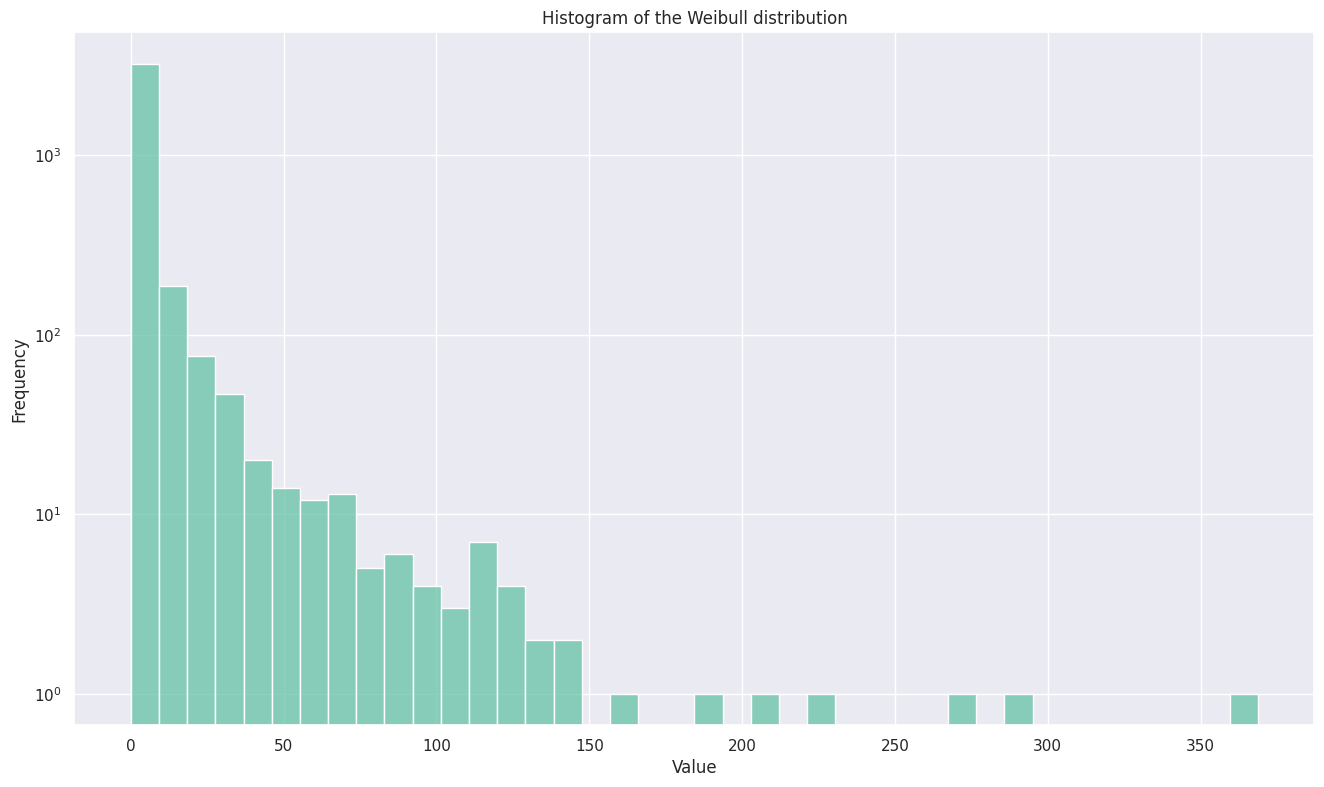

In [12]:
wbl_data = pd.DataFrame(wbl_sample, columns=['value'])

_, axs = make_plot(xlabex="Value", ylabel="Frequency", title="Histogram of the Weibull distribution")
axs.set_yscale('log')
sns.histplot(wbl_data['value'], bins=40)
plt.show()

Гистограмма похожа по форме на форму распределения Вейбулла

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам придумать решение этой проблемы и обосновать его применимость. Ситуация, когда статистическая модель не описывает какие-то артефакты в данных (как, например, нули в этой задаче) для практики типична, и с ней приходится что-то делать.

Ответьте на два вопроса:

а. Могут ли нули появляться если честно семплировать из распределения Вейбулла?

б. Зная плотность распределения и то, что компьютерная точность неабсолютна, откуда нули всё-таки взялись, учитывая то, что авторы задания сэмплировали выборку из распределения Вейбулла?

__Ответ:__

$p(x) = \gamma x^{\gamma - 1} e^{-x^{\gamma}}$

a. Носитель наспределения Вейбулла: $[0, \infty]$. $0 = F(0) = P(0 < X)$ и $F(x)$ непрерывна в 0, из этого следует, что вероятность выпадения 0 равна 0. Потому ноль появиться может лишь с нулевой вероятностью, то есть нет
б. Посмотрим на значения в датасете

In [13]:
wbl_data.head(10)

,value
0,0.29
1,1.52
2,0.54
3,0.00
4,0.75
5,0.38
6,0.16
7,0.00
8,0.31
9,0.33


Они, вполне вероятно, округлены или отброшены до 2 знаков после запятой, а вероятность попасть в $[0, 0.005)$ уже ненулевая, следовательно, нули отсюда и появились.

Давайте:
1) заменим нули на среднее по полуинтервалу, числа на котором предполагаем, что округлялись до 0, то есть, на $0.0025$
2) заменим нули на максимальное по полуинтервалу, числа на котором предполагаем, что отбрасывались, то есть, на $0.005$
3) просто забьем на них

In [14]:
wbl_data_test = {r"$0 \rightarrow 0.0025$": wbl_data.copy(),
                 r"$0 \rightarrow 0.005$": wbl_data.copy(),
                 r"$0 \rightarrow delete$": wbl_data.copy()}
wbl_data_test[r"$0 \rightarrow 0.0025$"][wbl_data['value'] == 0] = 0.0025
wbl_data_test[r"$0 \rightarrow 0.005$"][wbl_data['value'] == 0] = 0.005
wbl_data_test[r"$0 \rightarrow delete$"].drop(wbl_data[wbl_data['value'] == 0].index, inplace=True)

In [15]:
wbl_data_test[r"$0 \rightarrow delete$"].head(10)

,value
0,0.29
1,1.52
2,0.54
4,0.75
5,0.38
6,0.16
8,0.31
9,0.33
10,1.03
11,0.06


2. Посчитайте эмпирическую функцию распределения и
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки.

In [16]:
wbl_x = lambda x: np.log(x)
wbl_y = lambda data, x: np.log(-np.log(1 - sps.ecdf(np.array(data).flatten()).cdf.evaluate(x)))

**Постройте** график (`plt.scatter`) от (y', x') для Ваших способов борьбы с нулями разными цветами.
Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

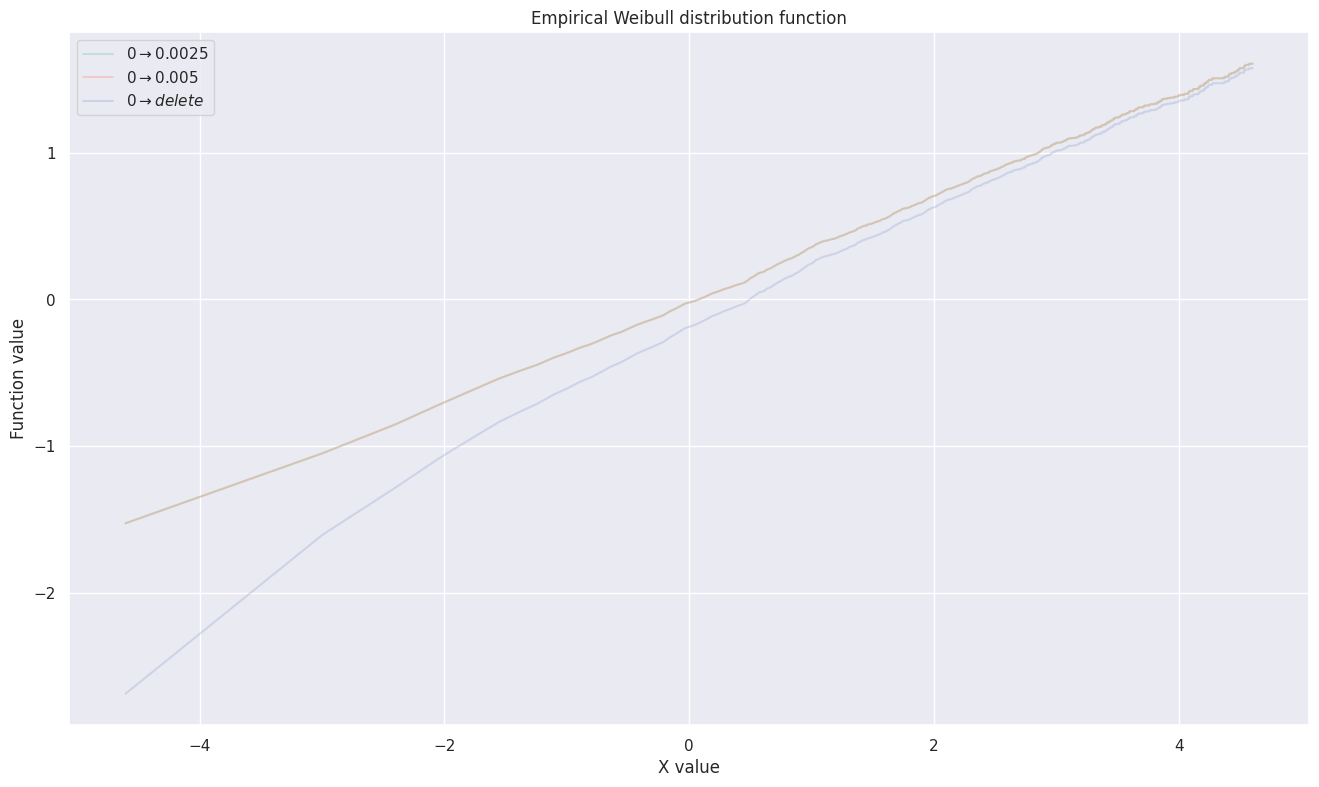

In [17]:
wbl_grd = np.linspace(10 ** -2, 10 ** 2, 2500)
_, axs = make_plot(xlabex=r'X value', ylabel=r'Function value',
                   title=f"Empirical Weibull distribution function")

for key, val in wbl_data_test.items():
    sns.lineplot(x=wbl_x(wbl_grd), y=wbl_y(val, wbl_grd), ax=axs, label=key, alpha=0.3)

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:**
Как мы видим, при простом отбрасывании нарушается линейность графика и мы перестаем учитывать важную часть определенных данных, близких к нулю. Замена на среднее и максимальное по полуинтервалу совсем не отличается, потому наиболее оптимальным является любой из методов и, как по мне, наиболее правильным в силу сохранения выборки и данных в наиболее приближенном к изначальной виде

In [18]:
wbl = wbl_data_test[r"$0 \rightarrow 0.0025$"].to_numpy()

3. Оцените параметр формы методом максимального правдоподобия
* по
первым 4 годам;
* по всей выборке.

Мы предполагаем, что Вы будете производить максимизацию по сетке --- для некоторого множества возможных параметров постройте сетку с некоторым шагом (для определённости возьмите шаг равный $10^{-3}$) и выберите лучший параметр на этой сетке. Известно, что $\log_{10}\gamma \in [-2, 2].$

Однако, если Вы хорошо поняли курс оптимизации, то можете написать оптимизатор, который находит максимум сам. Задачу можно переформулировать, чтобы ответ не изменился, а оптимизация шла быстрее. За хорошо сформулированную оптимизационную задачу и реализацию мы добавим 5 бонусных баллов.

Решение:

$p_{\gamma}(X) = \gamma^n \prod\limits_{k=1}^{n} x_k^{\gamma - 1} e^{-\sum\limits_{k=1}^{n} X_k^{\gamma}}$

$L_{\gamma}(X) = n \ln{\gamma} + (\gamma - 1) \sum\limits_{k=1}^{n} \ln(X_k) - \sum\limits_{k=1}^{n} X_k^{\gamma}$

$\frac{\partial}{\partial \gamma} L_{\gamma}(X) = \frac{n}{\gamma} + \sum\limits_{k=1}^{n} \ln(X_k) - \sum\limits_{k=1}^{n} \ln(X_k) X_k^{\gamma}$

$\frac{\partial^2}{\partial^2 \gamma} L_{\gamma}(X) = - \frac{n}{\gamma^2} - \sum\limits_{k=1}^{n} \ln^2(X_k) X_k^{\gamma}$

Реализую функцию, возвращающую оракул второго порядка

In [19]:
def wbl_get_grad(data):
    def grad(x):
        f0 = len(data) * np.log(x) + (x - 1) * np.log(data).sum() - (data ** x).sum()
        f1 = len(data) / x + np.log(data).sum() - (np.log(data) * data ** x).sum()
        f2 = - len(data) / x ** 2 - (np.log(data) ** 2 * data ** x).sum()
        return f0, f1, f2

    return grad

Реализуем метод Ньютона поиска минимума функции

In [20]:
from tqdm import trange


def newton_gd(grad, criterion, x_0=1.0, eps=1e-15, max_iter=10):
    """
    Ускоренный градиентный спуск
    :param grad: - функция, которая считает градиент целевой функции;
    :param criterion: - функция, считающая критерий;
    :param x_0: - начальная точка;
    :param eps: - точность сходимости (обычно 1e-8);
    :param max_iter: - количество итераций;
    """
    errors = []

    x_k = np.copy(x_0)
    err_x_0 = criterion(x_k)

    errors.append(criterion(x_k) / err_x_0)

    for _ in trange(max_iter):
        grad_val = grad(x_k)
        x_k -= grad_val[1] / grad_val[2]

        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

Найдем минимум функции правдоподобия при помощи метода Ньютона

In [21]:
WBL_EPS = 1e-15

wbl_stat = {"4 years": wbl[:365 * 4],
            "All time": wbl}

wbl_new = {}
for key, val in wbl_stat.items():
    grad_func = wbl_get_grad(val)
    wbl_new[key] = newton_gd(grad=grad_func, criterion=lambda x: np.abs(grad_func(x)[1]), eps=WBL_EPS)

 50%|█████     | 5/10 [00:00<00:00, 8658.76it/s]


Посмотрим на графики сходимости

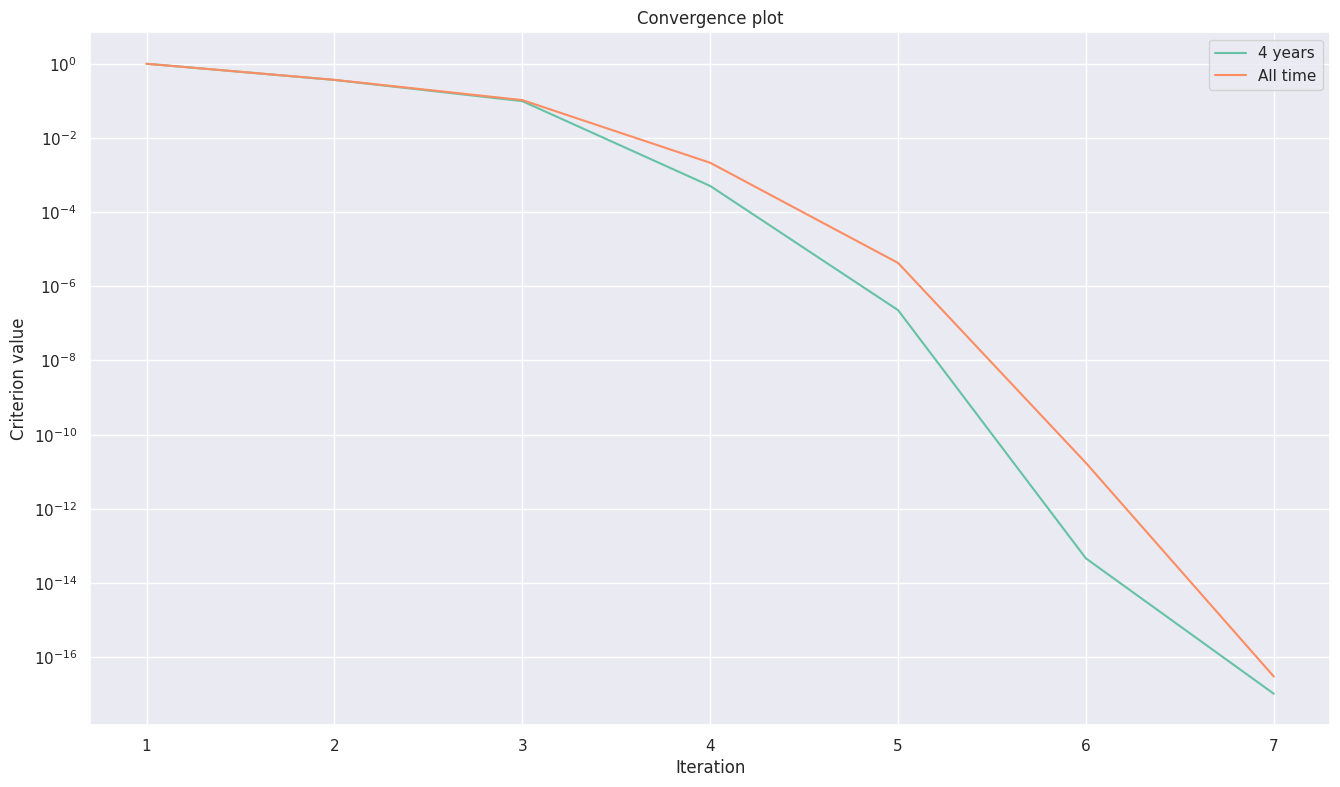

In [22]:
_, axs = make_plot(xlabex="Iteration", ylabel="Criterion value", title="Convergence plot")
axs.set_yscale("log")

for key, val in wbl_new.items():
    sns.lineplot(x=np.arange(1, len(val[1]) + 1), y=val[1], ax=axs, label=key)

Метод сошелся очень быстро на обеих выборках, всего за 7 итераций. Полученные значения:

In [23]:
for key, val in wbl_new.items():
    print(f"{key}: {val[0]:.7f}")

4 years: 0.3860551
All time: 0.3794593


Найдите в библиотеке `scipy.stats` класс, отвечающий за данное семейство распределений (будьте аккуратны, внимательно читайте документацию!), и изучите его метод `fit`. Как он находит оценку параметра? Примените эту функцию к нашим данным и сравните полученные результаты с результатами выше.

*Замечание.* Обратите внимание, для чего именно сей метод находит оценку? Сделайте так, чтобы он возвращал оценку непосредственно для интересующего нас параметра.

**Ответ:**

По умолчанию `fit` использует `MLE`, то есть, как раз метод максимального правдоподобия, аналогично тому, что делали мы. Применим `fit` и сравним рещультаты

In [24]:
from scipy.optimize import fmin


def wbl_optimizer(func, x0, args=(), **kwargs):
    return fmin(func, x0, args=args, maxiter=3000, xtol=WBL_EPS, ftol=WBL_EPS, **kwargs)


wbl_fit = {}
for key, val in wbl_stat.items():
    wbl_fit[key] = sps.weibull_min.fit(data=val, floc=0, fscale=1, optimizer=wbl_optimizer)[0]
    print(f"{key}: {wbl_fit[key].astype('float'):.7f}")

4 years: 0.3860551
All time: 0.3794593


Результаты сходятся с точностью до 7 знака. Значит, оба метода работают и дают одинаковый результат (невероятно, ведь методы одинаковые по сути!)

4. Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

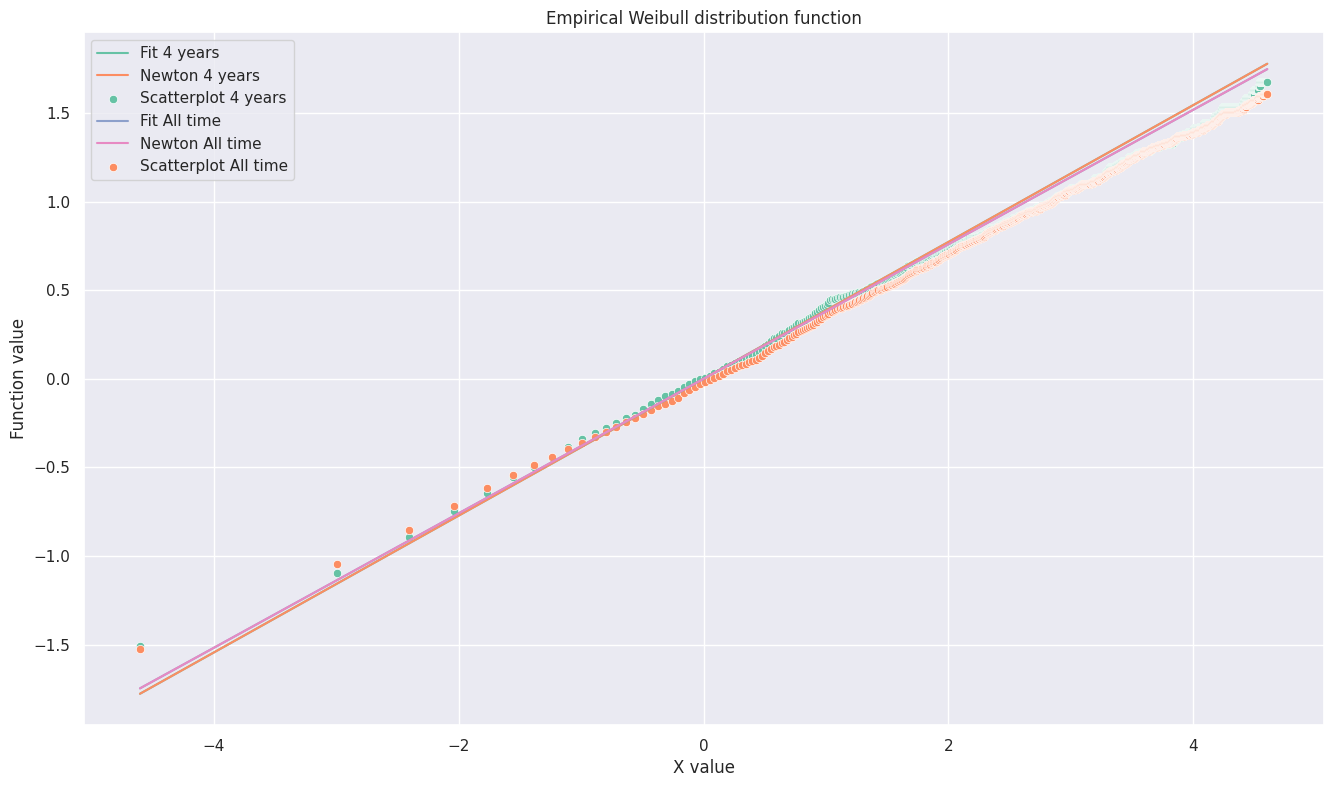

In [25]:
_, axs = make_plot(xlabex=r'X value', ylabel=r'Function value',
                   title=f"Empirical Weibull distribution function")

wbl_grd2 = np.linspace(wbl_x(wbl_grd).min(), wbl_x(wbl_grd).max(), 2500)

for key, _ in wbl_fit.items():
    sns.lineplot(x=wbl_grd2, y=wbl_fit[key] * wbl_grd2, ax=axs, label="Fit " + key)
    sns.lineplot(x=wbl_grd2, y=wbl_new[key][0] * wbl_grd2, ax=axs, label="Newton " + key)
    sns.scatterplot(x=wbl_x(wbl_grd), y=wbl_y(wbl_stat[key], wbl_grd), ax=axs, label="Scatterplot " + key)

Да, хорошо соответствуют. Еслть небольшие расхождения в районе малых точек в силу того, что мы заменили значения в них с 0 на чуть большие, получив не совсем до конца верные данные

**Вывод**

Мы научились по распределению подбирать гиперпараметры с помощью встроенных методов, с помощью коэффициента наклона графика распределения, выведя формулу аналитически и с помощью метода Ньютона минимизации значения функции. Все три метода дают весьма точный совпадающий результат. Так же рассмотрели различные способы того, как бороться с эффектом машинной точности, при возникновении проблем, как например в конкретной задаче с нулем в логарифме. Наилучшим методом оказалось проставлять приближенное безошибочное (ненулевое) значение

## Задача 3

Хорошим методом получения аналитических оценок является метод моментов.

1. Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**, см. [Википедию](https://en.wikipedia.org/wiki/Gamma_distribution)), $\theta = 3$ для всех распределений $(N = 1000).$ Посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Промоделируйте полученные оценки для разных размеров выборки $n < N$ и изучите их скорости сходимости. На графике отразите истинный параметр. Можете построить отдельный график модуля/квадрата разности оценки и параметра (риск) для какой-то выборке и посмотреть, как быстро риск сходится к нулю.

2. Есть два замечательных распределения, которые игнорировать никак нельзя. Первое --- $Pareto(k)$ с плотностью $p(x) = kx^{-k-1} I( x \ge 1)$, где $k > 0$. Второе --- $Cauchy(0, \theta)$  с плотностью $p(x) = \frac{\theta}{x^2 + \theta^2}$. Запишите оценки методом моментов для них и проверьте их на состоятельность на практике. Для моделирования возьмите то же значение параметра, что дано выше. *Подсказка:* внимательно изучите, чему равны моменты каждого из распределений и при каких условиях. Можно ли гарантировать состоятельность полученных оценок каким-то теоретическими фактами?

Решение (вывод метода моментов для каждого случая):

1) $N(0, \theta)$

    $\mathbb{E}\overline{X} = 0$
   
    $\mathbb{E}\overline{X^2} = \theta \Rightarrow \theta^* = \overline{X^2}$ - несмещенная и состоятельная (так как матожидание 0)

2) $U(0, \theta)$

    $\mathbb{E}\overline{X} = \theta / 2 \Rightarrow \theta^* = 2 \overline{X}$ - несмещенная и состоятельная

3) $\Gamma(1, \theta)$

    $\mathbb{E}\overline{X} = \theta \Rightarrow \theta^* = \overline{X}$ - несмещенная и состоятельная

4) $Pareto(k)$

    $\mathbb{E} \overline{X^{-1}} = \int\limits_{1}^{\infty} x^{-1} k x^{-k - 1}dx = \int\limits_{1}^{\infty} k x^{-k - 2}dx = \frac{k}{k + 1} \Rightarrow k^* = \frac{\overline{X^{-1}}}{1 - \overline{X^{-1}}}$
   
    Применяя УЗБЧ: $\frac{\sum\limits_{l=1}^{n}{X_l^{-1}}}{n} \rightarrow \mathbb{E} \overline{X^{-1}} = \frac{k}{k+1} \Rightarrow \lim\limits_{n \to \infty} \frac{\frac{\sum\limits_{l=1}^{n}{X_l^{-1}}}{n}}{1 - \frac{\sum\limits_{l=1}^{n}{X_l^{-1}}}{n}} = \frac{\frac{k}{k+1}}{1 - \frac{k}{k+1}} = k \Rightarrow$ оценка состоятельная

5) $Cauchy(0, \theta)$
    
    1) $\theta \neq 1$ 
       
        $\mathbb{E} \overline{(X^2 + 1)^{-1}} = \int\limits_{-\infty}^{\infty} \frac{\theta}{\pi} (x^2 + 1)^{-1} (x^2 + \theta^2)^{-1} = \left[\frac{\theta \tan^{-1}(x) - \tan^{-1} \left(\frac{x}{\theta} \right)}{\pi(\theta^2 - 1)}\right]_{-\infty}^{\infty} = (\theta + 1)^{-1}$
    
   2) $\theta = 1$ 
       
        $\mathbb{E} \overline{(X^2 + 1)^{-1}} = \int\limits_{-\infty}^{\infty} \frac{\theta}{\pi} (x^2 + 1)^{-1} (x^2 + \theta^2)^{-1} = \left[\frac{x}{x^2 + 1} + \tan^{-1}(x)\right]_{-\infty}^{\infty} = 2^{-1} = (\theta + 1)^{-1}$
   
   $\Rightarrow \theta^* = \overline{(X^2 + 1)^{-1}}^{-1} - 1$
   
    Применяя УЗБЧ: $\frac{\sum\limits_{l=1}^{n}{(X_l^2 + 1)^{-1}}}{n} \rightarrow \mathbb{E} \overline{(X^2 + 1)^{-1}} =  (\theta + 1)^{-1} \Rightarrow \lim\limits_{n \to \infty} \frac{\sum\limits_{l=1}^{n}{(X_l^2 + 1)^{-1}}}{n} - 1 = \theta \Rightarrow$ оценка состоятельная

In [26]:
THETA = 3
N = 1000

rvs_dst = {"Normal": sps.norm(loc=0, scale=np.sqrt(THETA)),
           "Uniform": sps.uniform(loc=0, scale=THETA),
           "Gamma": sps.gamma(a=1, loc=0, scale=THETA),
           "Pareto": sps.pareto(b=THETA, loc=0, scale=1),
           "Cauchy": sps.cauchy(loc=0, scale=THETA)}

rvs = {}
for key, val in rvs_dst.items():
    rvs[key] = val.rvs(size=(N, N))

rvs_apx = {"Normal": np.cumsum(rvs['Normal'] ** 2, axis=-1) / np.arange(1, N + 1),
           "Uniform": np.cumsum(rvs['Uniform'] * 2, axis=-1) / np.arange(1, N + 1),
           "Gamma": np.cumsum(rvs['Gamma'], axis=-1) / np.arange(1, N + 1),
           "Pareto": np.cumsum(1 / rvs['Pareto'], axis=-1) / (
                   np.arange(1, N + 1) - np.cumsum(1 / rvs['Pareto'], axis=-1)),
           "Cauchy": np.arange(1, N + 1) / np.cumsum(1 / (rvs['Cauchy'] ** 2 + 1), axis=-1) - 1}

rvs_apx_var = {}
for key, val in rvs_apx.items():
    rvs_apx_var[key] = np.var(rvs_apx[key][:, -1], axis=0)

rvs_rsk = {}
for key, val in rvs_apx.items():
    vectorized = np.vectorize(
        lambda est: integrate.quad(risk_quad, a=-10, b=10, args=(est, THETA, rvs_dst[key].pdf))[0])
    rvs_rsk[key] = vectorized(rvs_apx[key][0, :])

Визуализируем оценки

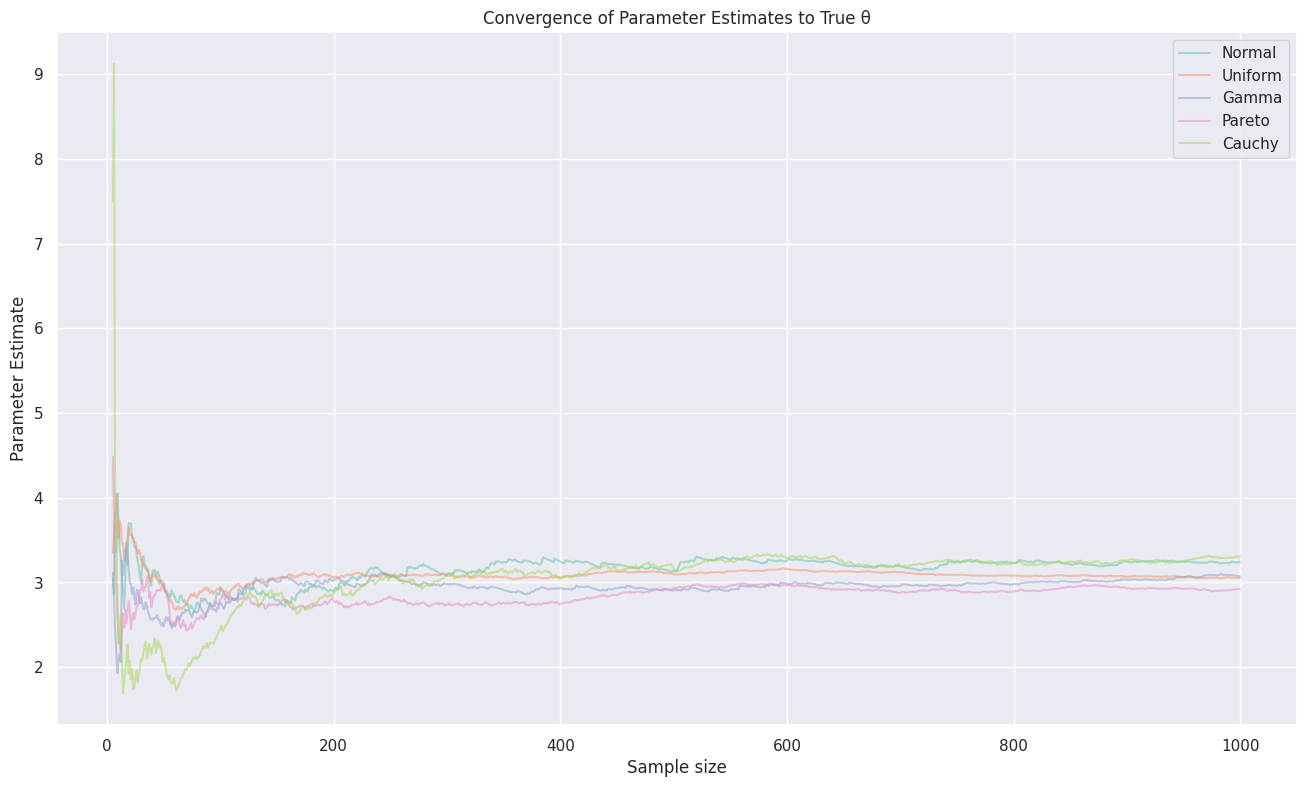

In [27]:
_, axs = make_plot(xlabex="Sample size", ylabel="Parameter Estimate",
                   title="Convergence of Parameter Estimates to True θ")

for key, val in rvs_apx.items():
    sns.lineplot(x=np.arange(5, N + 1), y=val[0, 4:], ax=axs, label=key, alpha=0.5)

Визуализируем риск

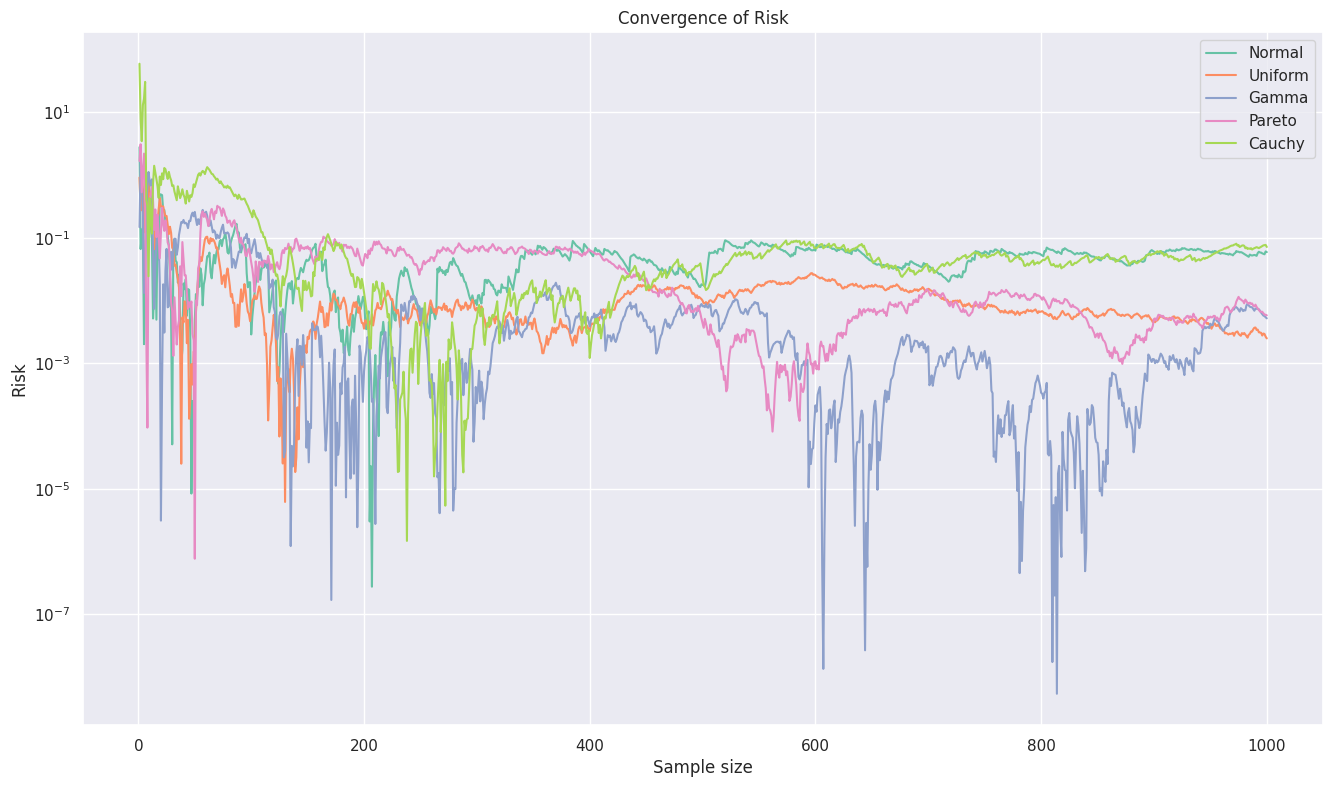

In [28]:
_, axs = make_plot(xlabex="Sample size", ylabel="Risk",
                   title="Convergence of Risk")

plt.yscale("log")
for key, val in rvs_rsk.items():
    sns.lineplot(x=np.arange(1, N + 1), y=val, ax=axs, label=key)

**Вывод:**

Иногда прямой метод моментов может не давать результата как в случае последних двух распределений (у Парето при подсчете матожидания в знаменателе при $k = 1$ может получиться 0, а у распределения Коши матожидания не существует в принципе), потому приходится придумывать другие моменты для получения оценки. Исходя из графиков и теоретических расчетов, все полученные оценки являются состоятельными

**Следующие две задачи посвящены тому, как получать более информативные оценки, чем точечные. Нам приходится обращаться к ним, так как свойства точечных оценок являются предельными, и мы мало что знаем о том, насколько конкретное значение оценки близко к истинному значению параметра. В условиях кровавой войны информация должна быть максимальной.**

### Задача 4. Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка) и какой-то отрезок, в который параметр попадёт с высокой вероятностью (такой отрезок называется **доверительным интервалом**_. На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Вспомним, как работает **метод подстановки** для получения оценок. В нём мы выражаем параметр при помощи распределения (как среднее или медиана, например), потом меняем распределение на эмпирическое и выражаем параметр уже через него. Бутстреп это подмена истинного распределения на эмпирическое.



1. Для каждого распределения из задачи 3 (в том числе из пункта 2) сгенерируйте выборку размера $N = 1000$. Далее замените Ваше распределение на равномерное распределение по построенной выборке (по теореме Гливенко-Кантелли эти распределения достаточно близки), и из эмпирического (равномерного) распределения постройте 1000 выборок. Опишите, как Вы будете это делать.

*Указание:* из истинного распределения (нормального и т.д.) новые данные генерировать **нельзя**. Бутстреп это способ получения псевдо-новых данных из уже имеющихся.

**Ответ:**

Ну вроде по коду и тз все и так очевидно как делать... ``np.random.choice`` выбирает числа из распределеня согласно равномерному по индексам. Проделываем так `B` раз для каждого распределения, получаем требуемое

In [37]:
rvs_boot = {}
for key, val in rvs.items():
    rvs_boot[key] = np.zeros((N, N))
    for b in range(N):
        rvs_boot[key][b] = np.random.choice(val[0], size=N, replace=True)

2. Для каждой псевдо-выборки из предыдущего пункта постройте оценку методом моментов из задачи 3: получится выборка оценок (как в домашке 1). По ней посчитайте эмпирическую (выборочную) дисперсию оценок и сделайте вывод о том, как связано значение дисперсии оценки (эмпирической и бутстрепной) с точностью и скоростью сходимости оценки к параметру.

In [38]:
rvs_boot_apx = {"Normal": np.cumsum(rvs_boot['Normal'] ** 2, axis=-1) / np.arange(1, N + 1),
                "Uniform": np.cumsum(rvs_boot['Uniform'] * 2, axis=-1) / np.arange(1, N + 1),
                "Gamma": np.cumsum(rvs_boot['Gamma'], axis=-1) / np.arange(1, N + 1),
                "Pareto": np.cumsum(1 / rvs_boot['Pareto'], axis=-1) / (
                        np.arange(1, N + 1) - np.cumsum(1 / rvs_boot['Pareto'], axis=-1)),
                "Cauchy": np.arange(1, N + 1) / np.cumsum(1 / (rvs_boot['Cauchy'] ** 2 + 1), axis=-1) - 1}

rvs_boot_apx_var = {}
for key, val in rvs_boot_apx.items():
    rvs_boot_apx_var[key] = np.var(rvs_boot_apx[key][:, -1], axis=0)

In [39]:
print("Эмпирическая дисперсия:")
for key, val in rvs_apx_var.items():
    print(f"--> {key}: {val}")
print("\nБутстрепная дисперсия:")
for key, val in rvs_boot_apx_var.items():
    print(f"--> {key}: {val}")

Эмпирическая дисперсия:
--> Normal: 0.018049353754815728
--> Uniform: 0.0029916712622090847
--> Gamma: 0.008782560625019739
--> Pareto: 0.009572942765381237
--> Cauchy: 0.02518105563271678

Бутстрепная дисперсия:
--> Normal: 0.01897893835257669
--> Uniform: 0.002819683784714144
--> Gamma: 0.009763982069840737
--> Pareto: 0.009059604702130401
--> Cauchy: 0.02898704068962562


3. Как мы знаем, оценка методом моментов не гарантирует несмещённости. При помощи метода бутстрапирования найдите смещение (разницу между мат. ожиданием оценки и значением параметра) каждой оценки. Какие оценки (в теории) несмещённые?

In [42]:
rvs_boot_dif = {}
for key, val in rvs_boot_apx.items():
    rvs_boot_dif[key] = val[3, -1].mean() - THETA

print("Смещение:")
for key, val in rvs_boot_dif.items():
    print(f"--> {key}: {val}")

Смещение:
--> Normal: 0.27231455281130357
--> Uniform: 0.04884812514334902
--> Gamma: 0.1783991549123285
--> Pareto: 0.026970933610760195
--> Cauchy: 0.3382561278177363


Исходя из смещения, оценки для нормального, гамма и распределения Коши не являются несмещенным, а оценки для равномерного и парето распределения являются несмещенными

**Вывод:**

### Задача 5. Байес.

**Эта задача является бонусной и стоит 30 (!!!) баллов**

Байесовское оценивание даёт ультиматимативный способ построения оценок без какой-либо потери в информации. Теперь мы оцениваем параметры распределения не точками и не отрезками, а распределениями!

1. Будем смотреть на параметрическое семейство распределений как на условное распределение: $P_{\theta} = P(X | \theta)$. В байесовском подходе подразумевается, что параметр $\theta$ сам приходит из некоторого **априорного** распределения (которое статист либо предпологает сам, либо предпологает исходя из внешних знаний об области).

Вспомним теорему Байеса: $p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}$, где знаменатель $p(x)$ получается как интеграл по $\theta$ от числителя. В зависимости от того, можем ли мы взять этот интеграл, выбирается тип байесовской оценки. $p(X | \theta)$ мы знаем, это хорошо нам знакомое правдоподобие, $p(\theta)$ называется априорным распределением (prior) параметра, мы его выбираем сами исходя из наших предпочтений, $p(X)$ от параметра не зависит и называется обоснованностью (evidence), и показывает, насколько правдоподобна выборка в терминах выбранного семейства распределений.

Скачайте датасет сердечных заболеваний: https://colab.research.google.com/drive/1J5ujdgEDwLhie13d4XDd3manrNe_c3Ek#scrollTo=vd8WgXL3jjzL

Мы будем предсказывать наличие и степень выраженности болезни (переменная num) это наличие, используя следующие параметры: age, sex, fbs, chol

Переменная num имеет категориальное распределение. Напишите его плотность и докажите, что сопряжённым к нему будет распределение Дирихле https://en.wikipedia.org/wiki/Dirichlet_distribution.

Доказательство:

Пока что мы работаем в модели, которая не учитывает никаких параметров и рассматриваем весь датасет как единую выборку индикаторов степени выраженности болезни (num).

2. "Байес для бедных" (Poor man's bayes)

Пусть интеграл в знаменателе мы считать не умеем и мы готовы с этим смириться. Что в таком случае делать? Можно искать моду (максимум) апостериорной плотности $P(\theta | X)$, где $X$ --- выборка, и рассматривать оценку $\theta$ как точку максимума.

Подберите три различных априорных распределения на параметр (т.е. три разных набора параметров априорного распределения Дирихле) и найдите максимум апостериорной плотности.
Преобразуйте задачу максимизации и найдите максимум по сетке или оптимизатором.

Сделайте вывод о том, как влияет априорная информация о параметре на оценку? Вспомните лекции из курса машинного обучения. На какой объект похоже априорное распределение? Как его следует выбирать. Как связаны максимум апостериорной плотности и оценка максимального правоподобия?

Ответ:

Вы --- врач и оценка вероятности $\mathsf P(num=0)$ оказывается больше, чем 0.3, то Вы отправите пациента на доп. обследование и возможно на лечение. Как лучше подобрать априорное распределение, чтобы оценке байеса для бедных можно было доверять. Почему вообще одни априорные параметры могут быть лучше других?

Ответ:

Подберите такой порог $P(num = 0)$ при котором пациент отправляется на доп. обследование и два таких набора априорных параметров, при которых для данной выборки порог достигается и не достигается.

Сделайте вывод о выборе априорного распределения.

3. Байес для богатых (обычный байес).

Отказываться считать интеграл нельзя, за это полагается смертная казнь.

Посчитайте и визуализируйте апостериорные плотности для разных априорных параметров. Если плотность оказывается слишком похожа на дельта-функцию, считайте её не для всей выборки

Что Вы бы брали точечной оценкой параметра исходя из апостериорного распределения? Почему?

4. Выбор модели.

Рассмотрим несколько моделей предсказания сердечных заболеваний. Модели будут очень простыми --- у нас будет разный параметр вероятности для разных групп пациентов. Предложите 4-5 разбиений пациентов на группы (по полу/возрасту/каким-то порогам на количество сахара или холестерина в крови) и рассмотрите модели, при которых параметры категориального распределения оказываются разными или одинаковыми для разных групп. Посмотрите на пример с семинара. Посчитайте обоснованность в каждом случае.

**Указание:** не считайте интеграл, так как обоснованностью будет произведение комбинаторных коэффициентов и бета-функций.

**Указание:** При сравнении обоснованности для модели, которая учитывает разбиение на группы с той, которая не учитывает, плотность всё равно следует факторизовать на группы, чтобы анализ был одинаковым.

Например, для сравнения модели "параметр зависит от возраста" и "параметр зависит от пола" необходимо разделить данные на 4 группы "молодые/старые мужчины/женщины". См. пример с семинара.

Предполагая возможнность модели "параметр зависит от пола" мы делаем неявное предположение, что данные для разных полов приходят из разных совокупностей, а значит их нельзя объединять в одну выборку. Осторожно формулируйте, в каких предположениях Вы сравниваете модели.

У какой модели выше обоснованность? Почему?

Сделайте вывод о байесовском оценивании: